# Path Finding Algorithms

Template for traversing a network iteratively.

```
def iterative_explore(network, start):
    Q = []
    Q.insert(start)
    while Q != []:
        v = Q.remove()
        process(v)
        for u in network.neighbors(v):
            if 'visited' not in network.nodes[u] and u not in Q:
                Q.insert(u)
```

Idea: 
+ Have a queue/list that stores nodes that we might want to visit next.
+ Iteratively remove nodes from the queue/list to visit next.

The queue/list is an important aspect of this problem.  Many variations of the problem requires complex data structures beyond a simple list/queue.

When the graph is very large, neighbors have to be deteremined *dynamically*.

In our examples/problems, the network/graph is predetermined and given to us as a whole.

In [1]:
import networkx as nx
from matplotlib import pyplot as plt
import random

def draw_graph(g):
    nx.draw(g, with_labels=True)
    
def draw_weighted_graphs(g, pos='spring'):
    if pos=='spring':
        pos=nx.spring_layout(g)
    elif pos=='shell':
        pos=nx.shell_layout(g)
    else:
        pos=nx.random_layout(g)
    labels = nx.get_edge_attributes(g,'distance')
    nx.draw(g, pos, with_labels=True)
    nx.draw_networkx_edge_labels(g,pos,edge_labels=labels)

def random_subgraph(g, k):
    nodes = random.sample(list(g.nodes),k)
    return g.subgraph(nodes)


### Visiting all cities starting form Winston Salem

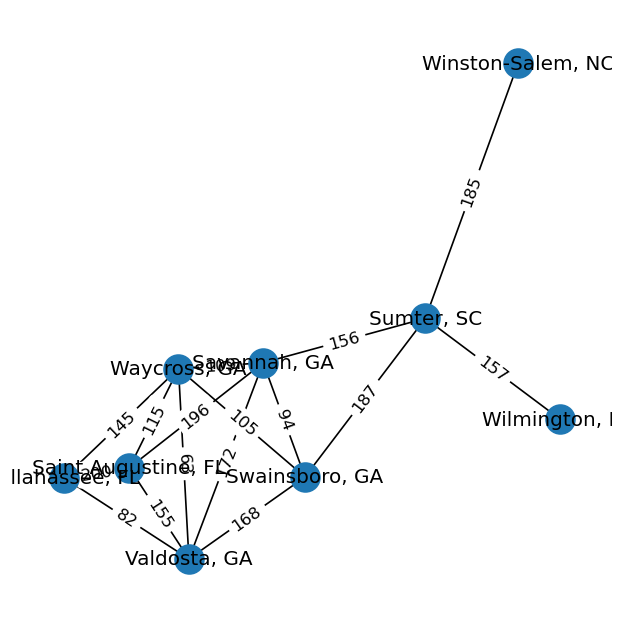

In [8]:
g = nx.read_gml('savannah350_200.gml')
fig = plt.figure(1, figsize=(5, 5), dpi=120)
draw_weighted_graphs(g, 'spring')

### Simple path finding (DFS)

In [9]:
def visit_node(g, v):
    g.nodes[v]['visited'] = True
    print('visiting', v)
    
def DFS(g, start):
    Q = []
    Q.append(start)
    while len(Q) > 0:
        v = Q.pop(-1)       # remove the last city that was inserted.
        if 'visited' not in g.nodes[v]:
            visit_node(g, v)
            for u in g.neighbors(v):
                if 'visited' not in g.nodes[u] and u not in Q:
                    Q.append(u)

In [10]:
g = nx.read_gml('savannah350_200.gml')
DFS(g, 'Winston-Salem, NC')

visiting Winston-Salem, NC
visiting Sumter, SC
visiting Savannah, GA
visiting Waycross, GA
visiting Tallahassee, FL
visiting Saint Augustine, FL
visiting Valdosta, GA
visiting Wilmington, NC
visiting Swainsboro, GA


### Finding short paths from a source to all cities.

Starting from a city, e.g Winstom Salem, we want to find the shortest distances (or shortest paths) to all other cities.

Dijkstra's Algorithm: 
+ Has the same template/structure as DFS.
+ The difference is in choosing the nearest city to the source to visit next.  Not closest from where you are, but closest to the source.

<a href="Priority_Queues.ipynb">Priority Queues</a>

In [14]:
def insert_or_update(Q, g, v, u):
    if v==u:
        g.nodes[v]['dist_from_src'] = 0
        Q.put(v, g.nodes[v]['dist_from_src'])
    else:
        if 'dist_from_src' not in g.nodes[u]:
            g.nodes[u]['dist_from_src'] = g.nodes[v]['dist_from_src'] + g[v][u]['distance']
            Q.put(u, g.nodes[u]['dist_from_src'])
        elif g.nodes[u]['dist_from_src'] > g.nodes[v]['dist_from_src'] + g[v][u]['distance']:
            g.nodes[u]['dist_from_src'] = g.nodes[v]['dist_from_src'] + g[v][u]['distance']
            Q.adjust(u, g.nodes[u]['dist_from_src'])
        print('\tupdate {} with {}'.format(u, g.nodes[u]['dist_from_src']))


In [15]:
from priority_queue import PriorityQueue

def visit_node(g, v, start):
    g.nodes[v]['visited'] = True
    print('Visiting', v, g.nodes[v]['dist_from_src'], 'miles from', start)
    
def Dijkstra(g, start):
    Q = PriorityQueue('min')
    insert_or_update(Q, g, start, start)
    while len(Q) > 0:
        v, priority = Q.get()
        if 'visited' not in g.nodes[v]:
            visit_node(g, v, start)
            for u in g.neighbors(v):
                if 'visited' not in g.nodes[u]:
                    insert_or_update(Q, g, v, u)

def DFS(g, start):
    Q = []
    Q.append(start)
    while len(Q) > 0:
        v = Q.pop(-1)       # remove the last city that was inserted.
        if 'visited' not in g.nodes[v]:
            visit_node(g, v)
            for u in g.neighbors(v):
                if 'visited' not in g.nodes[u] and u not in Q:
                    Q.append(u)

In [18]:
g = nx.read_gml('savannah350_200.gml')
Dijkstra(g, 'Winston-Salem, NC')

Visiting Winston-Salem, NC 0 miles from Winston-Salem, NC
	update Sumter, SC with 185
Visiting Sumter, SC 185 miles from Winston-Salem, NC
	update Swainsboro, GA with 372
	update Wilmington, NC with 342
	update Savannah, GA with 341
Visiting Savannah, GA 341 miles from Winston-Salem, NC
	update Swainsboro, GA with 372
	update Valdosta, GA with 513
	update Saint Augustine, FL with 537
	update Waycross, GA with 450
Visiting Wilmington, NC 342 miles from Winston-Salem, NC
Visiting Swainsboro, GA 372 miles from Winston-Salem, NC
	update Valdosta, GA with 513
	update Waycross, GA with 450
Visiting Waycross, GA 450 miles from Winston-Salem, NC
	update Valdosta, GA with 513
	update Saint Augustine, FL with 537
	update Tallahassee, FL with 595
Visiting Valdosta, GA 513 miles from Winston-Salem, NC
	update Tallahassee, FL with 595
	update Saint Augustine, FL with 537
Visiting Saint Augustine, FL 537 miles from Winston-Salem, NC
	update Tallahassee, FL with 595
Visiting Tallahassee, FL 595 miles

In [20]:
print('Distance to Tallahassee, FL:', g.nodes['Waycross, GA']['dist_from_src'])

Distance to Tallahassee, FL: 450


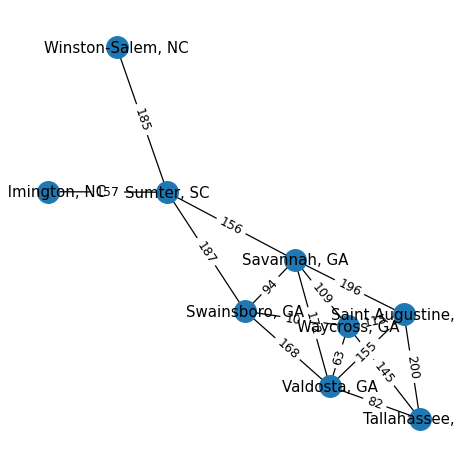

In [17]:
g = nx.read_gml('savannah350_200.gml')
fig = plt.figure(1, figsize=(5, 5), dpi=90)
draw_weighted_graphs(g, 'spring')

### A* Algorithm

Applications in Artificial Intelligence, e.g. planning paths for robots. Similar to navigation apps.

Finding short path from a source to a destination.

How is this different from Dijkstra's algorithm for finding shortest distances to all cities?

+ It has a specific destination. We want to find the shortest distance from a source to a specific destination.  This has important implications on how we prioritize which nodes to visit next.

+ The A* algorithm differs from Dijkstra's algorithm in how they prioritize which nodes/cities to visit next.

+ Dijkstra: the city to visit next is the one that is closest to the source.

+ A*: we're interested in finding the short distance from source to destination.  Which city should we visit next?


In [21]:
def insert_or_update(Q, g, v, u, dest):
    if v==u:
        g.nodes[v]['dist_from_src'] = 0
        Q.put(v, g.nodes[v]['dist_from_src'])
    else:
        if 'dist_from_src' not in g.nodes[u]:
            g.nodes[u]['dist_from_src'] = g.nodes[v]['dist_from_src'] + g[v][u]['distance'] + est(u, destination)
            Q.put(u, g.nodes[u]['dist_from_src'])
        elif g.nodes[u]['dist_from_src'] > g.nodes[v]['dist_from_src'] + g[v][u]['distance'] + est(u, destination):
            g.nodes[u]['dist_from_src'] = g.nodes[v]['dist_from_src'] + g[v][u]['distance'] + est(u, destination)
            Q.adjust(u, g.nodes[u]['dist_from_src'])
        print('\tupdate {} with {}'.format(u, g.nodes[u]['dist_from_src']))

        
def A_star(g, start, dest):
    Q = PriorityQueue('min')
    insert_or_update(Q, g, start, start, dest)
    while len(Q) > 0:
        v, priority = Q.get()
        if 'visited' not in g.nodes[v]:
            visit_node(g, v, start)
            for u in g.neighbors(v):
                if 'visited' not in g.nodes[u]:
                    insert_or_update(Q, g, v, u, dest)
